In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style = "float:right" type="submit" value="Toggle code">''')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [2]:
t1 = pd.read_csv(r"C:\Users\admin\AppData\Local\Temp\Temp1_titanic.zip\train.csv")
t2 = pd.read_csv(r"C:\Users\admin\AppData\Local\Temp\Temp1_titanic.zip\test.csv")
tt = pd.concat([t1, t2], ignore_index=True, sort  = False)

In [3]:
tt.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
tt.shape

(1309, 12)

In [6]:
tt.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier 

In [8]:
tt.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

Text(0.5, 1.0, 'Training Data - Percentage of people survived and Deceased')

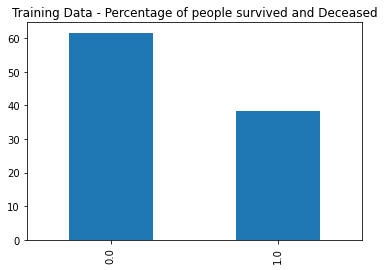

In [9]:
(tt.Survived.value_counts(normalize = True)*100).plot.bar().set_title("Training Data - Percentage of people survived and Deceased")

In [10]:
pclass1_survived = round((tt[tt.Pclass == 1].Survived == 1).value_counts()[1]/len(tt[tt.Pclass == 1]) * 100)
print(pclass1_survived)

42.0


In [11]:
pclass1_deceased = round((tt[tt.Pclass == 1].Survived == 0).value_counts()[1]/len(tt[tt.Pclass == 1]) * 100)
print(pclass1_deceased)

25.0


In [12]:
pclass2_survived = round((tt[tt.Pclass == 2].Survived == 1).value_counts()[1]/len(tt[tt.Pclass == 2]) * 100)
print(pclass2_survived)

31.0


In [13]:
pclass2_deceased = round((tt[tt.Pclass == 2].Survived == 0).value_counts()[1]/len(tt[tt.Pclass == 2]) * 100)
print(pclass2_deceased)

35.0


In [14]:
pclass3_survived = round((tt[tt.Pclass == 3].Survived == 1).value_counts()[1]/len(tt[tt.Pclass == 3]) * 100)
print(pclass3_survived)

17.0


In [15]:
pclass3_deceased = round((tt[tt.Pclass == 3].Survived == 0).value_counts()[1]/len(tt[tt.Pclass == 3]) * 100)
print(pclass3_deceased)

52.0


Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

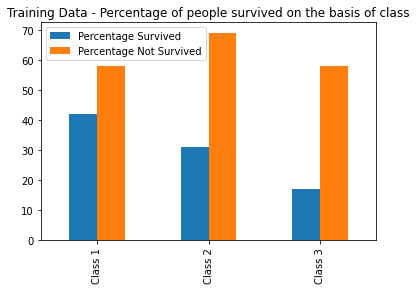

In [16]:
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass1_survived,"Class 2": pclass2_survived, "Class 3": pclass3_survived},  
     "Percentage Not Survived":{"Class 1": 100-pclass1_survived,"Class 2": 100-pclass2_survived, "Class 3": 100-pclass1_survived}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

Text(0.5, 1.0, 'Percentage of people survived on basis of gender')

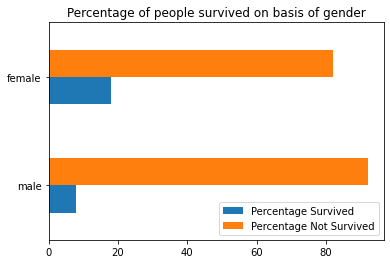

In [17]:
#survival and deceased plot according to sex of the passenger 
Women_survived  = round((tt[tt.Sex == 'female'].Survived == 1).value_counts()[1]/len(tt.Sex) * 100)
Men_survived  = round((tt[tt.Sex == 'male'].Survived == 1).value_counts()[1]/len(tt.Sex) * 100)
male_female_percent_df = pd.DataFrame({"Percentage Survived":{"male": Men_survived,"female":Women_survived},  "Percentage Not Survived":{"male": 100-Men_survived,"female": 100-Women_survived}})
male_female_percent_df.plot.barh().set_title('Percentage of people survived on basis of gender')


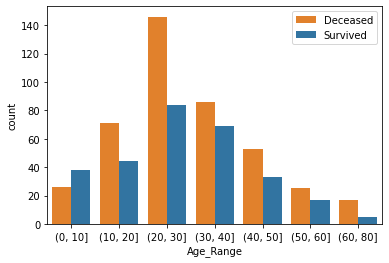

In [18]:
tt['Age_Range'] = pd.cut(tt.Age ,[0,10,20,30,40,50,60,80])
sns.countplot(x = 'Age_Range',hue = 'Survived',data = tt,palette =["C1", "C0"]).legend(labels = ["Deceased", "Survived"] )

In [19]:
tt.SibSp.describe() #the probability of a person surviving was inversely proportional to the number of their siblings or spouse . People with less Sibling and spouse had higher chances of survival than the people with more number of siblings and spouse 

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

Text(0.5, 1.0, 'Number of Sibling and(or) spouse vs survival count')

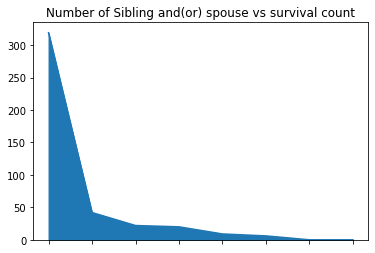

In [20]:
#we are adding a new coloumn for siblings and spouse 
sibspouse = pd.DataFrame()
sibspouse['Survived'] = tt.Survived
sibspouse['Siblings_spouse'] = pd.cut(tt.SibSp , [0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 ])
#now we will plot sibling_spouse to see the number of people who survived with respect to the number of siblings and spouse 
(sibspouse.Siblings_spouse.value_counts()).plot.area().set_title("Number of Sibling and(or) spouse vs survival count")
#we can see the verdict from the given graph that lesser the number of siblings and(or) spouse higher the chance of survivial , 
#the x axis has the siblings count as - [(0,1) ,(1,2),(2,3),(3,4),(4,5),(5,6) ,(6,7),(7,8)] 

In [21]:
#now the next parameter we will analyze is Parch
tt.Parch.describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

Text(0.5, 1.0, 'Children/ parent survival density')

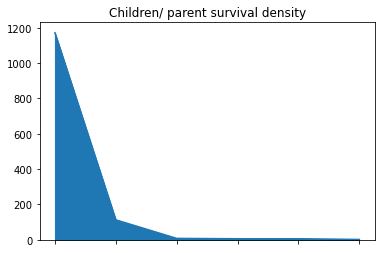

In [22]:
#now we will make an area plot to see parent/children survival density
pc = pd.DataFrame()
pc['Survived'] = tt.Survived
pc['parentndchildren'] = pd.cut(tt.Parch , [0 ,1, 2, 3, 4, 5 , 6] , include_lowest = True)
(pc.parentndchildren.value_counts()).plot.area().set_title('Children/ parent survival density')
# in the given graph the x axis has the values = [(0,1) ,(1,2),(2,3),(3,4),(4,5),(5,6)]

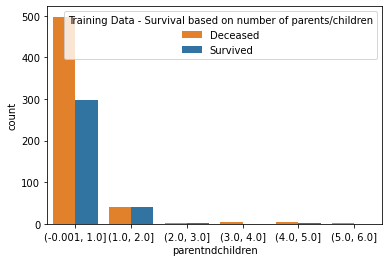

In [23]:
x = sns.countplot(x = "parentndchildren", hue = "Survived", data = pc, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"], loc = 'upper right')
x.set_title("Training Data - Survival based on number of parents/children")

In [24]:
#now we make a coloumn where we club sbsp and parch together , if their sum is zero then the person is travelling alone
tt['Family'] = tt.SibSp + tt.Parch
tt['Alone']  = tt.Family

In [25]:
#since ticket does not provide us with any useful information , we move on to the next coloumn 'Fare'
tt.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

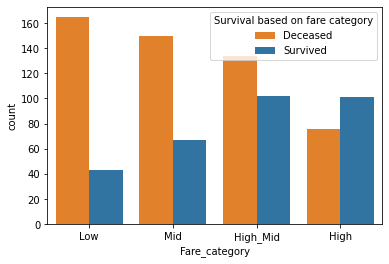

In [26]:
tt['Fare_category'] = pd.cut(tt.Fare ,bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',
                                                                                      'High_Mid','High'])
x = sns.countplot(x = "Fare_category", hue = "Survived", data = tt, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")


In [27]:
#since the cabin has lot of missing values we dont compute it now , we will now compute embarkment , embarkment is the boarding point of the traveller
tt.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

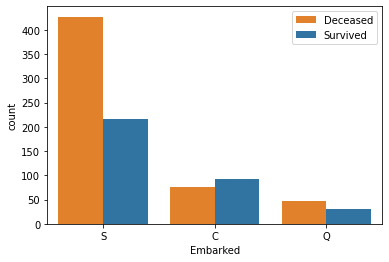

In [28]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = tt, palette=["C1", "C0"]).legend(labels=["Deceased","Survived"])

In [29]:
tt.Embarked.fillna(tt.Embarked.mode()[0], inplace = True)

In [30]:
tt.Embarked.describe() #as we can see below , embarked had 2 missing values , therefore going by the probability we have filled the 2 missing values with S

count     1309
unique       3
top          S
freq       916
Name: Embarked, dtype: object

In [31]:
tt.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [32]:
 tt.Cabin= tt.Cabin.fillna('NA')

In [33]:
tt.Cabin.describe()


count     1309
unique     187
top         NA
freq      1014
Name: Cabin, dtype: object

In [34]:
medianage = tt['Age'].median()
print(medianage)

28.0


In [35]:
tt.Age = tt.Age.fillna(medianage)#since many values were missing in the age coloumn , we filled it with the median of all the ages

In [36]:
# we are encoding the data here because , machine learning don't go well with strings , therefore we are converting them into integer number 
#we have used labelencoder() for sex and family and for other coloumns we have used dummies 
tt = pd.concat([tt,pd.get_dummies(tt.Cabin, prefix="Cabin"),pd.get_dummies(tt.Age_Range, prefix="Age_Range"), pd.get_dummies(tt.Embarked, prefix="Emb", drop_first = True),pd.get_dummies(tt.Fare_category, prefix="Fare", drop_first = True), pd.get_dummies(tt.Pclass, prefix="Class", drop_first = True)], axis=1)
tt['Sex'] = LabelEncoder().fit_transform(tt['Sex'])
tt['Alone'] = LabelEncoder().fit_transform(tt['Alone'])


In [37]:
#we are dropping the coloumns as we have created a dummy one :)
tt.drop(['Pclass', 'Fare','Cabin', 'Fare_category','Name', 'Ticket','Embarked', 'Age_Range', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)


In [38]:
#now we can use two algorithms for the data prediction of our dataset , 
# 1. Naive Bayes 2. Random forest classifier 
#but Random forest classifier has got higher accuracy than the former , therefore we will use random forest classifier 

In [39]:
X_to_be_predicted = tt[tt.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#Training data
train_data = tt
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape

(891, 206)

RF Accuracy: 81.56%
The cross validated score for Random forest is: 83.57


Text(0.5, 1.05, 'Confusion_matrix for RF')

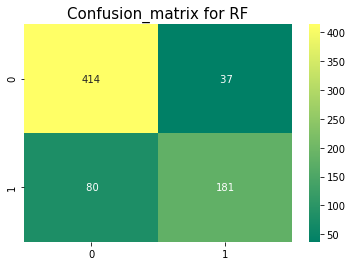

In [40]:
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [41]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv
